In [ ]:
# if library is not installed, use this
# pip install colorthief
# !pip install easydev                 #version 0.12.0
# !pip install colormap                #version 1.0.4
# !pip install opencv-python           #version 4.5.5.64
# !pip install colorgram.py            #version 1.2.0
# !pip install extcolors               #version 1.0.0

In [97]:
#numpy and pandas
import numpy as np
from numpy import asarray
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# image processing tool
from glob import glob
import cv2
import extcolors
from colormap import rgb2hex
from PIL import Image
import imageio

# other tools
from sklearn.metrics import mutual_info_score
import seaborn as sns

In [41]:
# load the image
image1 = Image.open('final_data/shot_eggblue_marilyn_1964-19604.png')
image2 = Image.open('final_data/shot_blue_marilyn_1964-19604.jpg')
image3 = Image.open('final_data/shot_red_marilyn_1964-19604.png')
image4 = Image.open("final_data/shot_orange_marilyn_1964-19604.png")
image5 = Image.open("final_data/shot_turq_marilyn_1964-19604.png")

# convert image2 from jpg into png
image2 = image2.convert('RGBA')
image2.save('final_data/blue.png', 'PNG')

image_url = ['final_data/shot_eggblue_marilyn_1964-19604.png',
             'final_data/blue.png',
             'final_data/shot_red_marilyn_1964-19604.png',
             'final_data/shot_orange_marilyn_1964-19604.png',
            'final_data/shot_turq_marilyn_1964-19604.png']
images = [image1,image2,image3,image4,image5]

In [42]:
# for each image, create Pillow image, and store image data
data_image=[]
for image in images:
    # convert image to numpy array
    data = asarray(image)
    data_image.append(data)
    print(type(data))
    # summarize shape
    print(data.shape)

    # create Pillow image
    image_pillow = Image.fromarray(data)
    print(type(image_pillow))

    # summarize image details
    print(image_pillow.mode)
    print(image_pillow.size)
    print('------------------')

<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------
<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------
<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------
<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------
<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)
------------------


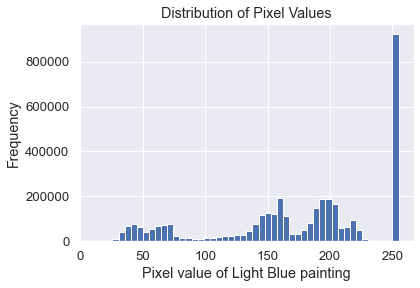

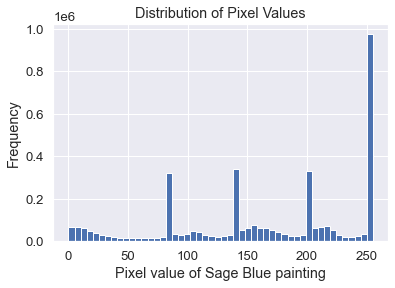

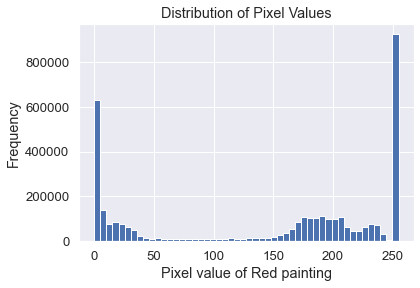

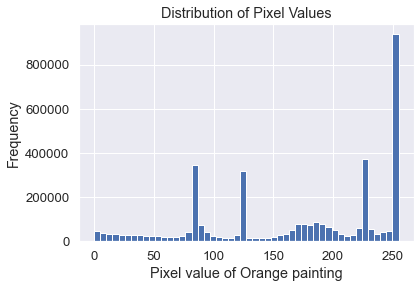

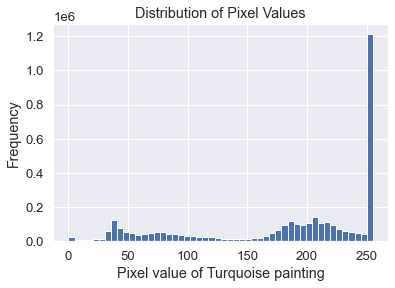

In [108]:
# distribution of pixel values for each image
image_name = ['Light Blue','Sage Blue','Red','Orange','Turquoise']
for data,col_name in zip(data_image,image_name):
    pd.Series(data.flatten()).plot(kind='hist',bins=50,title='Distribution of Pixel Values')
    plt.xlabel("Pixel value of {} painting".format(col_name))
    plt.show()

In [6]:
# This block of code referenced from 
# https://towardsdatascience.com/image-color-extraction-with-python-in-4-steps-8d9370d9216e 


def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

def exact_color(img, img_url, tolerance, zoom):
    #background
    bg = 'bg.png'
    fig, ax = plt.subplots(figsize=(192,108),dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)
    
    
    #crate dataframe
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 13)
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_precent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 150, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(img_url)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    return plt.show()

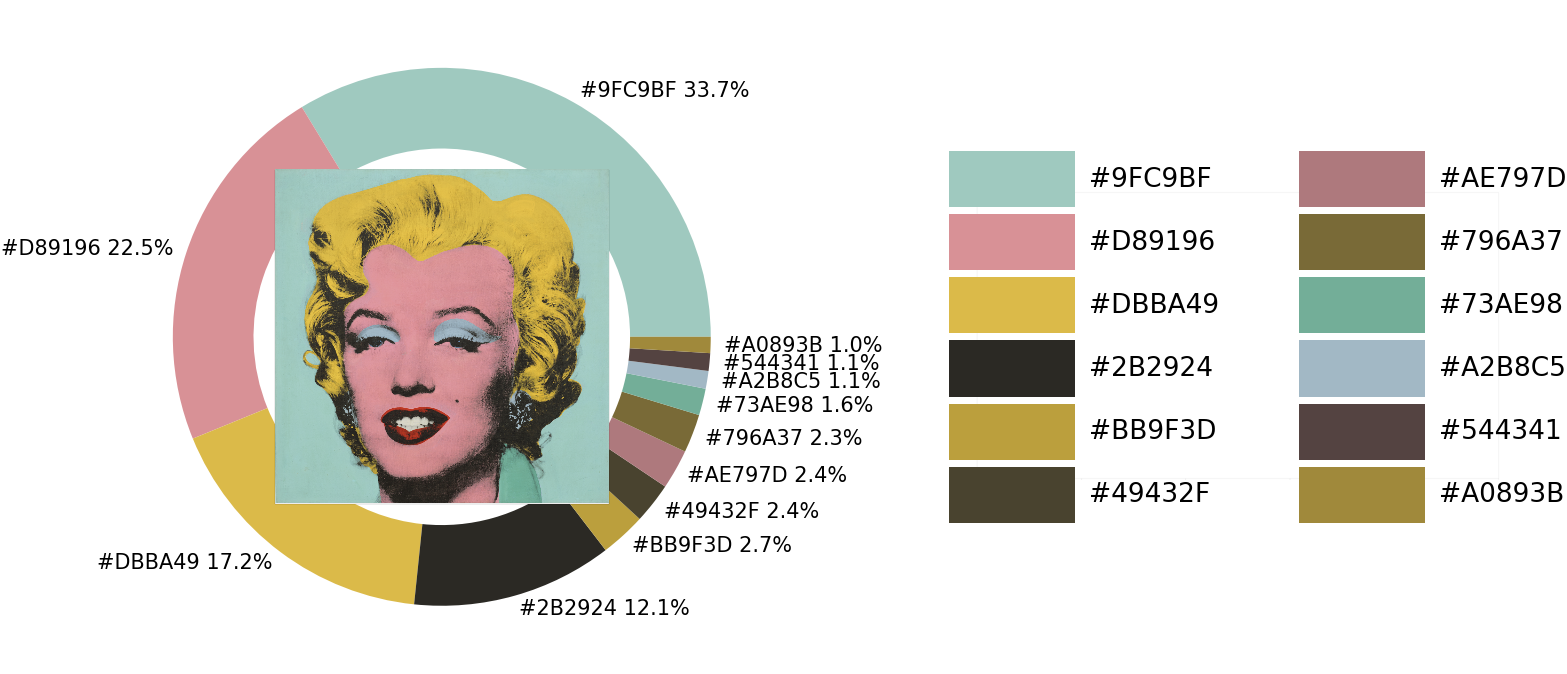

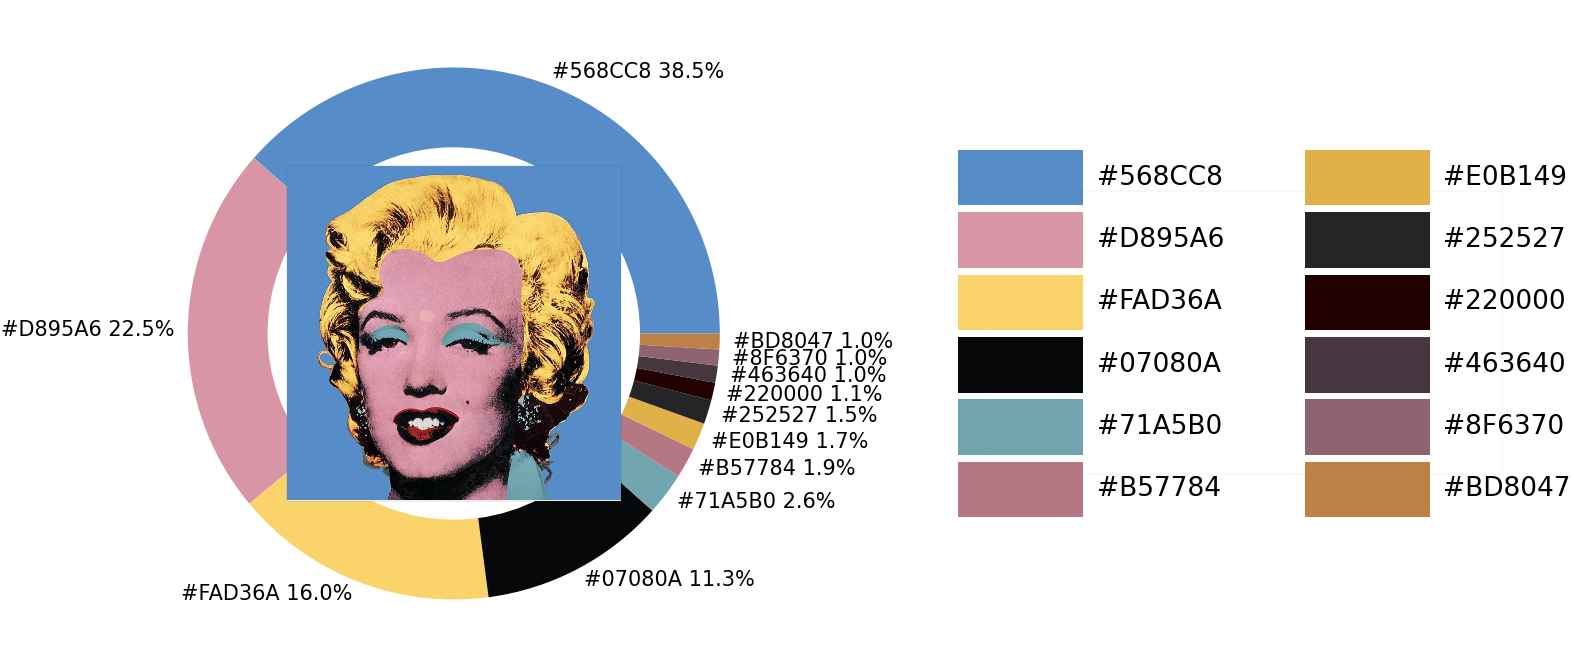

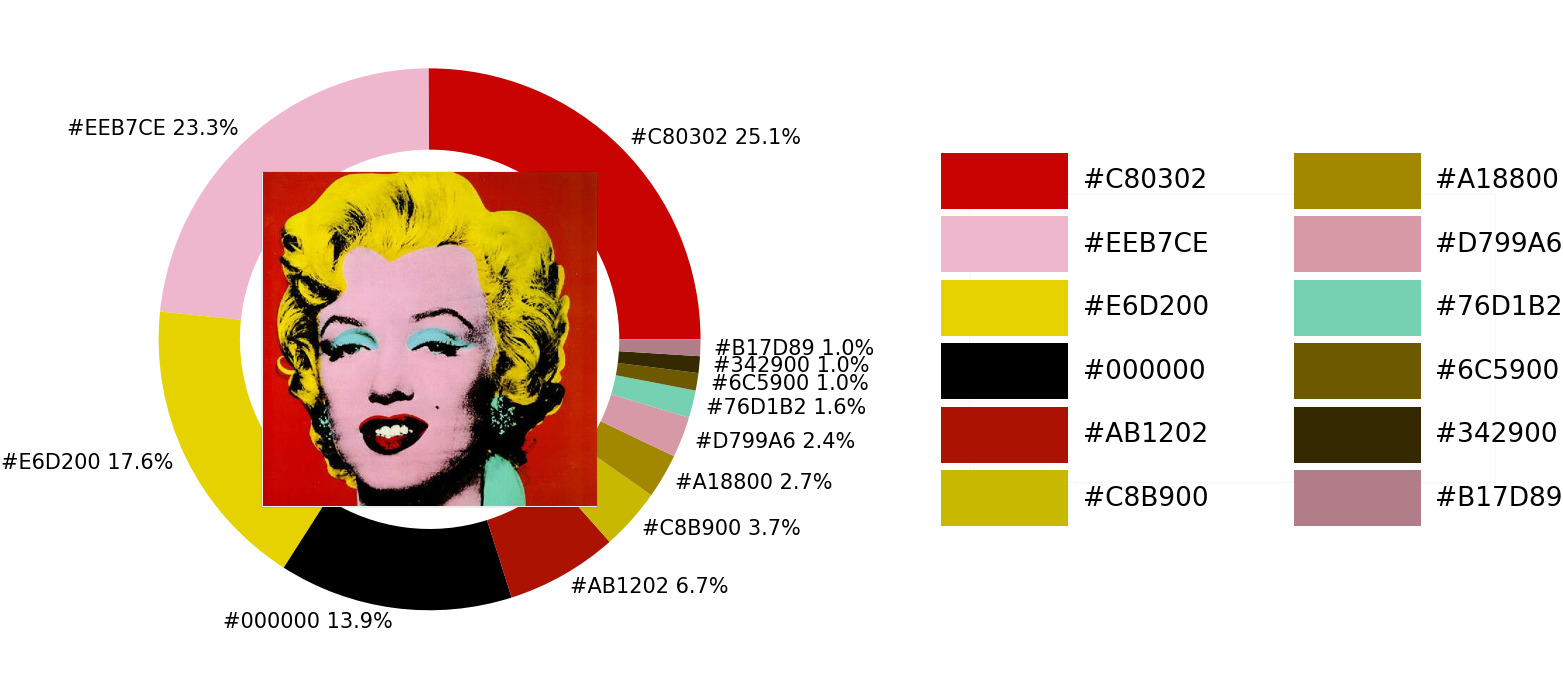

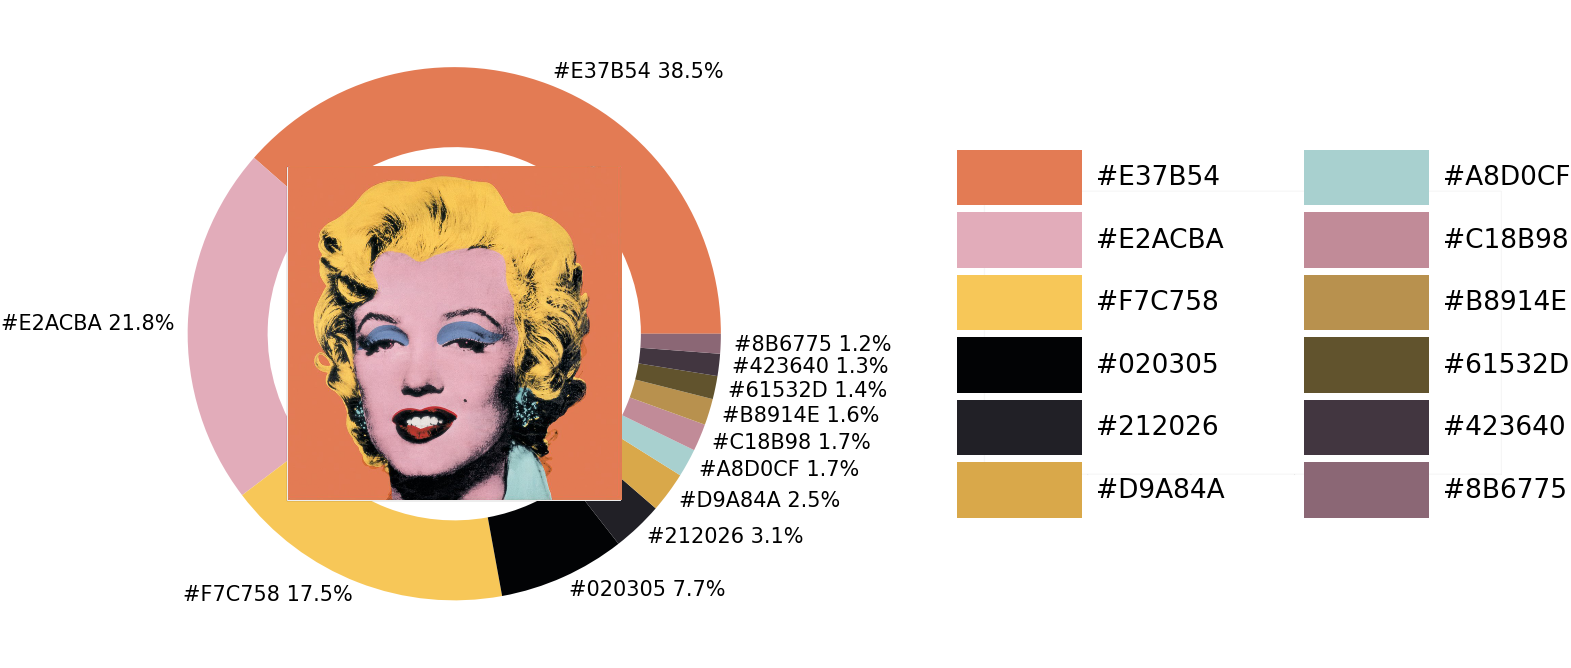

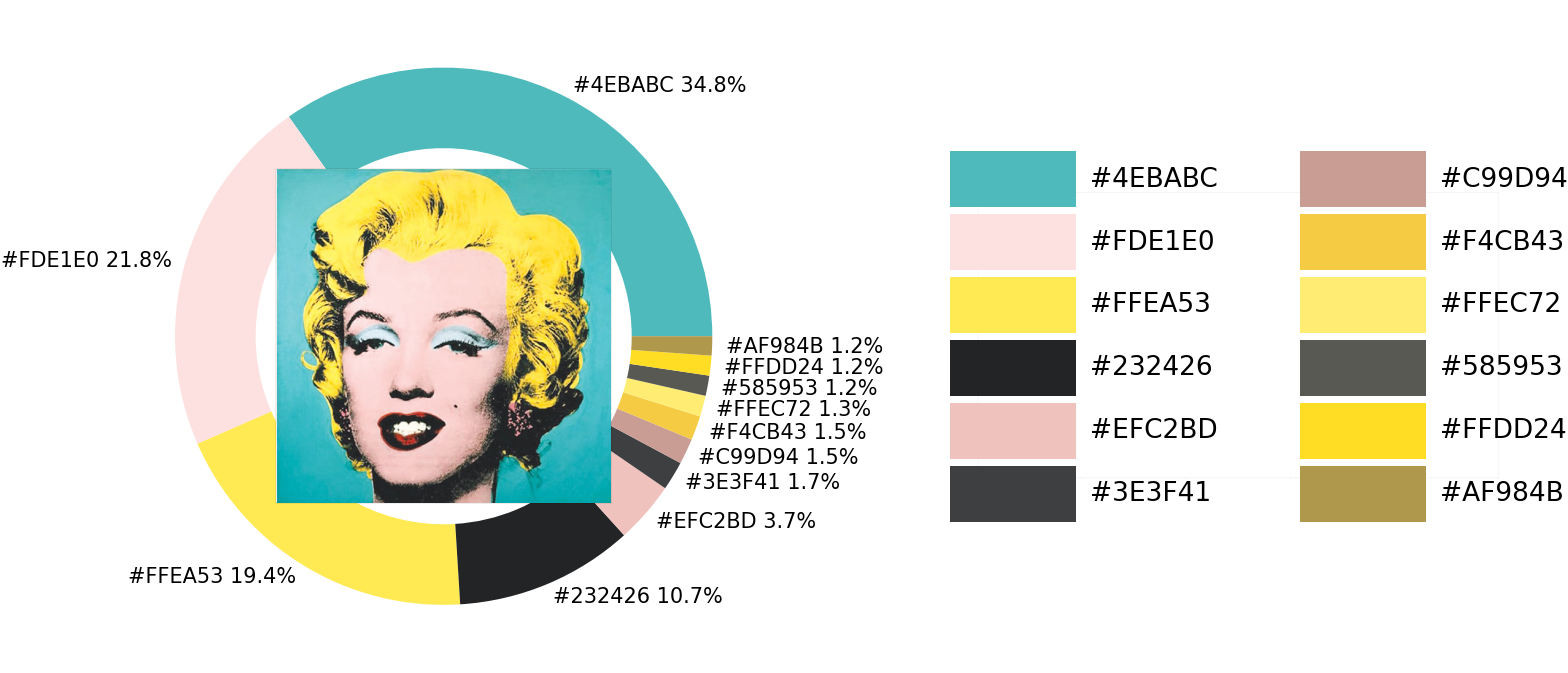

In [44]:
# plot color extraction result for each images used function above
for image,imageUrl in zip(images,image_url):
    exact_color(image, imageUrl, 12, 2.5)

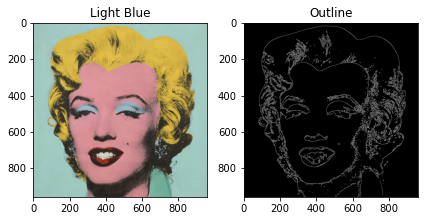

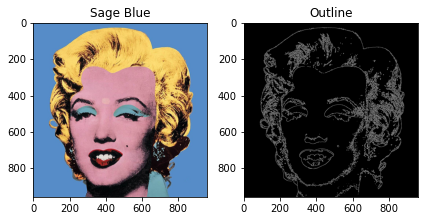

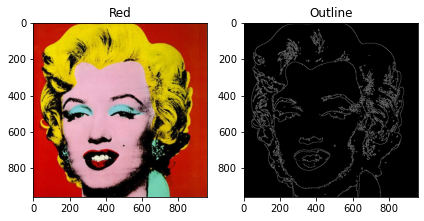

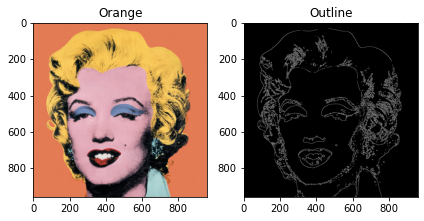

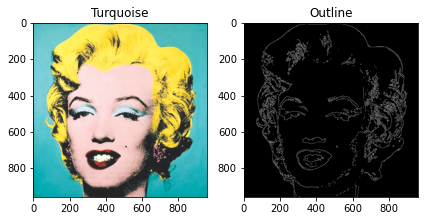

In [51]:
# Image outlines
for img_url,imageName in zip(image_url,image_name):
    img = cv2.imread(img_url)
    # adjust threshold here for different edge detection effect, lower value = more lines
    edges = cv2.Canny(img,200,250,L2gradient=False)

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(imageName)

    # Display edges image
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Outline')

    plt.tight_layout()
    plt.show()

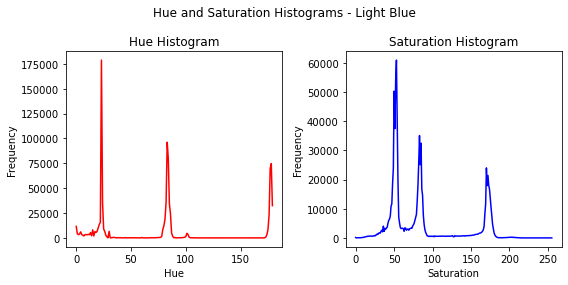

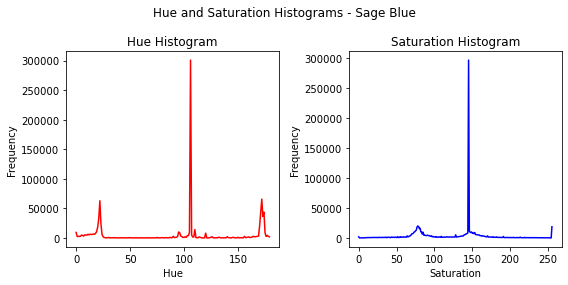

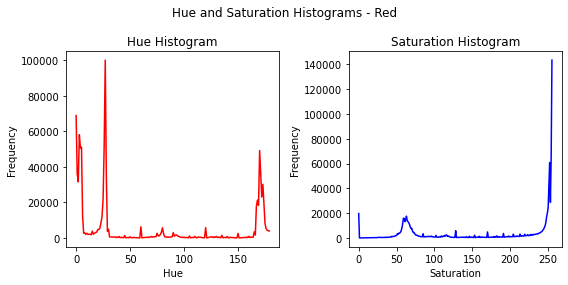

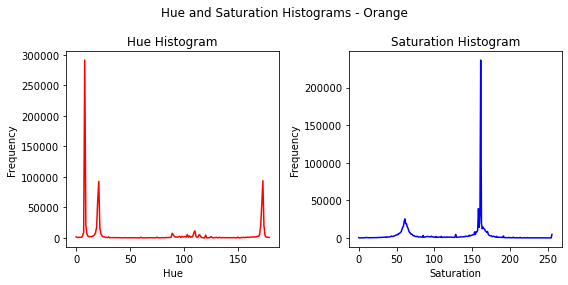

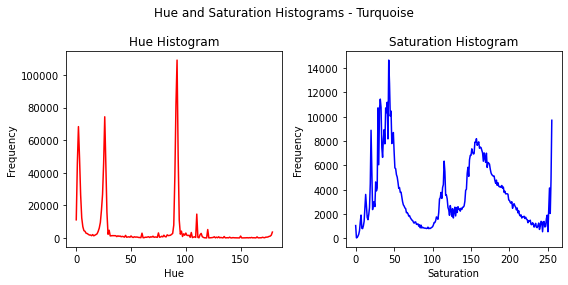

In [52]:


def analyze_hue_saturation(image_url):
    # Read the image
    img = cv2.imread(image_url)
    
    # Convert BGR to HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Split the channels
    h, s, v = cv2.split(hsv_img)
    
    # Compute histogram of hue and saturation channels
    hue_hist = cv2.calcHist([hsv_img], [0], None, [180], [0, 180])
    saturation_hist = cv2.calcHist([hsv_img], [1], None, [256], [0, 256])
    
    return h, s, hue_hist, saturation_hist


# List to store the results
results = []

# Analyze hue/saturation and compute histograms for each image
for image_path in image_url:
    h, s, hue_hist, saturation_hist = analyze_hue_saturation(image_path)
    
    # Store the results in a dictionary
    result = {
        "image_path": image_path,
        "h": h,
        "s": s,
        "hue_hist": hue_hist,
        "saturation_hist": saturation_hist
    }
    
    results.append(result)

# Plot the histograms of hue and saturation for each image
for result, imageName in zip(results,image_name):
    image_path = result["image_path"]
    hue_hist = result["hue_hist"]
    saturation_hist = result["saturation_hist"]
    
    # Plot the hue histogram
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(hue_hist, color='r')
    plt.title("Hue Histogram")
    plt.xlabel("Hue")
    plt.ylabel("Frequency")
    
    # Plot the saturation histogram
    plt.subplot(1, 2, 2)
    plt.plot(saturation_hist, color='b')
    plt.title("Saturation Histogram")
    plt.xlabel("Saturation")
    plt.ylabel("Frequency")
    
    plt.suptitle(f"Hue and Saturation Histograms - {imageName}")
    plt.tight_layout()
    plt.show()


Below are plots created following graphs in the Geometry of Color.

distribution of rgb values for each images in ratio

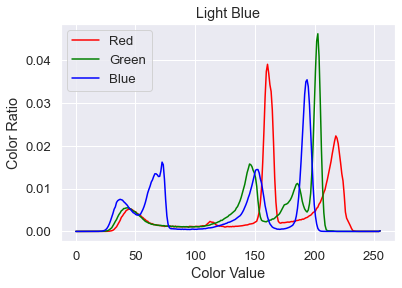

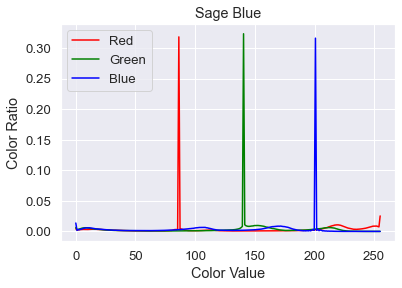

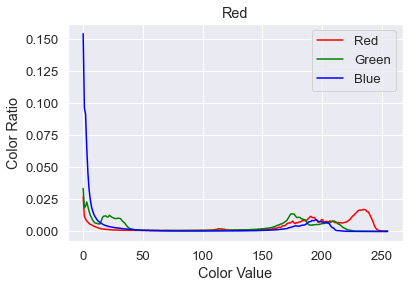

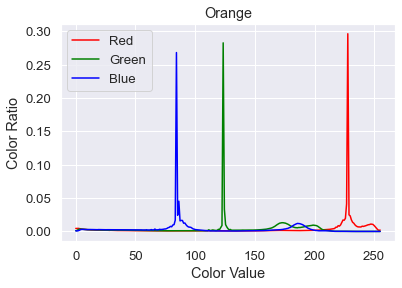

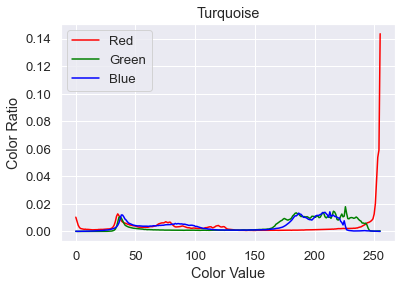

In [123]:
def plot_color_distributions(image, title):
    # Split the image into color channels
    red_channel = image[:, :, 0].flatten()
    green_channel = image[:, :, 1].flatten()
    blue_channel = image[:, :, 2].flatten()

    # Calculate the color ratios
    height, width, channels = image.shape

    # Calculate the total number of pixels
    total_pixels = height * width
    # total_pixels = red_channel.size
    red_ratio = red_channel / 255
    green_ratio = green_channel / 255
    blue_ratio = blue_channel / 255

    # Create a continuous range for x-axis
    x_range = np.linspace(0, 1, num=256)

    # Compute the color distributions
    red_distribution, _ = np.histogram(red_ratio, bins=x_range)
    green_distribution, _ = np.histogram(green_ratio, bins=x_range)
    blue_distribution, _ = np.histogram(blue_ratio, bins=x_range)

    # Normalize the distributions to get ratios
    red_distribution = red_distribution / total_pixels
    green_distribution = green_distribution / total_pixels
    blue_distribution = blue_distribution / total_pixels

    # Plot the color distributions as ratios
    plt.plot(x_range[:-1]*256, red_distribution, color='red', label='Red')
    plt.plot(x_range[:-1]*256, green_distribution, color='green', label='Green')
    plt.plot(x_range[:-1]*256, blue_distribution, color='blue', label='Blue')
    plt.xlabel('Color Value')
    plt.ylabel('Color Ratio')
    plt.title(title)
    plt.legend()
    plt.show()

# Process the images
for imageName, image_data in zip(image_name, data_image):
    # Plot the color distributions
    plot_color_distributions(image_data, imageName)


Relative conditional entropy plot for images

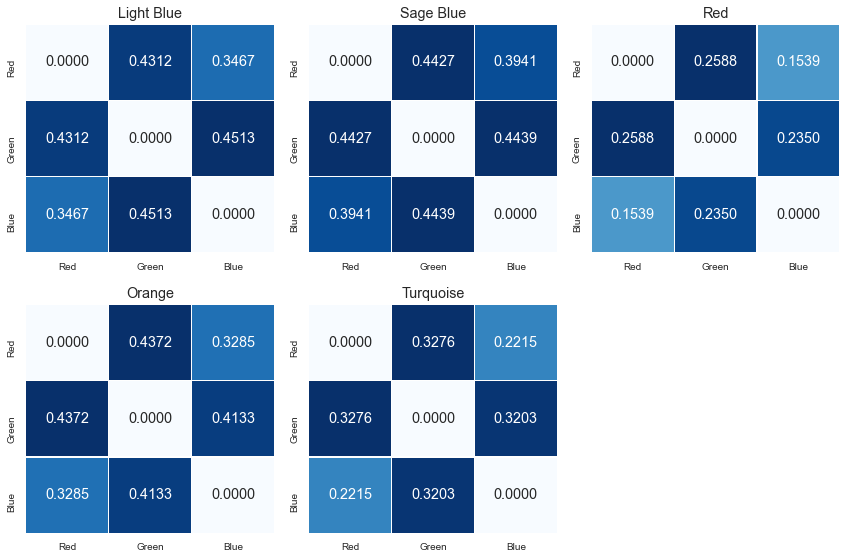

In [110]:
# Calculate the relative conditional entropy
def calculate_relative_conditional_entropy(image):
    # Split the image into color channels
    red_channel = image[:, :, 0].flatten()
    green_channel = image[:, :, 1].flatten()
    blue_channel = image[:, :, 2].flatten()

    # Calculate the relative conditional entropy
    red_green_entropy = mutual_info_score(red_channel, green_channel) / mutual_info_score(green_channel, green_channel)
    red_blue_entropy = mutual_info_score(red_channel, blue_channel) / mutual_info_score(blue_channel, blue_channel)
    green_blue_entropy = mutual_info_score(green_channel, blue_channel) / mutual_info_score(blue_channel, blue_channel)

    return red_green_entropy, red_blue_entropy, green_blue_entropy

# Create subplots for each image
num_rows = 2
num_cols = (len(image_url) + 1) // num_rows  # Adjust the number of columns based on the number of images
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Generate the 3x3 tables for each image
for imageName, imgData, ax in zip(image_name, data_image, axes.flat):
    # Calculate the relative conditional entropy values
    red_green_entropy, red_blue_entropy, green_blue_entropy = calculate_relative_conditional_entropy(imgData)

    # Create a DataFrame for the table
    table_data = np.array([[0, red_green_entropy, red_blue_entropy],
                           [red_green_entropy, 0, green_blue_entropy],
                           [red_blue_entropy, green_blue_entropy, 0]])

    # Create a heatmap table using seaborn
    df = pd.DataFrame(table_data, columns=['Red', 'Green', 'Blue'], index=['Red', 'Green', 'Blue'])
    sns.set(font_scale=1.2)
    sns.heatmap(df, annot=True, fmt=".4f", cmap='Blues', cbar=False, linewidths=0.5, ax=ax)

    # Set the plot title and axis labels
    ax.set_title(imageName)
    ax.tick_params(axis='both', labelsize=10)

# Remove empty subplots
if len(image_paths) < num_rows * num_cols:
    for ax in axes.flat[len(image_paths):]:
        ax.axis('off')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plots
plt.show()



three ROI for my code: ROI: region of interest in the image, which we focus on the hair color, eye shadow color, and background color

In [1]:
# import cv2
# import numpy as np

# def process_image(image_path):
#     # Load the image
#     image = cv2.imread(image_path)

#     # Define the number of cubes for each level
#     cube_sizes = [5, 4, 3]

#     # Process the yellow flower crowns (yf-ROI)
#     yf_roi = process_roi(image, cube_sizes, color_range=(0, 70))

#     # Process the green stems (g-ROI)
#     g_roi = process_roi(image, cube_sizes, color_range=(70, 140))

#     # Process the background (bg-ROI)
#     bg_roi = process_roi(image, cube_sizes, color_range=(140, 256))

#     return yf_roi, g_roi, bg_roi

# def process_roi(image, cube_sizes, color_range):
#     # Convert the image to the LAB color space
#     lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

#     # Divide the LAB color space into cubes
#     cubes = create_color_cubes(cube_sizes)

#     # Attach pixels to color cubes based on their colors
#     attached_pixels = attach_pixels_to_cubes(lab_image, cubes)

#     # Cluster the color cube representatives
#     clusters = cluster_color_cube_representatives(attached_pixels)

#     # Select clusters based on color consistency
#     selected_clusters = select_clusters(clusters, color_range)

#     # Collect the pixels from the selected clusters
#     roi_pixels = collect_pixels(selected_clusters, cubes)

#     return roi_pixels

# def create_color_cubes(cube_sizes):
#     cubes = []
#     for cube_size in cube_sizes:
#         color_space = np.indices((cube_size, cube_size, cube_size)).reshape(3, -1).T
#         cubes.append(color_space)
#     return cubes

# def attach_pixels_to_cubes(lab_image, cubes):
#     attached_pixels = []
#     for cube in cubes:
#         cube_mask = np.all((lab_image[:, :, 1:] // 32) == cube, axis=2)
#         attached_pixels.append(lab_image[cube_mask])
#     return attached_pixels

# def cluster_color_cube_representatives(attached_pixels):
#     clusters = []
#     for attached_pixel in attached_pixels:
#         pixel_colors = attached_pixel[:, 1:]
#         cluster = cv2.kmeans(pixel_colors.astype(np.float32), 1, None, criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0), attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)
#         clusters.append(cluster[2][0])
#     return clusters

# def select_clusters(clusters, color_range):
#     selected_clusters = []
#     for cluster in clusters[color_range[0]:color_range[1]]:
#         if np.mean(cluster[:, 0]) > 100:  # Adjust the threshold as needed
#             selected_clusters.append(cluster)
#     return selected_clusters

# def collect_pixels(selected_clusters, cubes):
#     roi_pixels = []
#     for cluster in selected_clusters:
#         cube_index = np.argmax(np.all((cluster[:, np.newaxis, 1:] // 32) == cubes[0], axis=2))
#         cube_pixels = cubes[0][cube_index]
#         roi_pixels.extend(cube_pixels[:, np.newaxis, :] * 32)
#     return np.concatenate(roi_pixels, axis=0)

# # Process the image and obtain the ROIs
# yf_roi, g_roi, bg_roi = process_image(image_url[0])

# # Display the ROIs
# cv2.imshow('Yellow Flower Crowns (yf-ROI)', yf_roi)
# cv2.imshow('Green Stems (g-ROI)', g_roi)
# cv2.imshow('Background (bg-ROI)', bg_roi)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
